# About

## Coca-Cola Company Market Performance (2019-2024)

During the period from 2019 to 2024, the market performance of the Coca-Cola Company reflects its position and activity in the financial market. This period covers five years of business activity, during which the company faced challenges and opportunities in the global economic scenario.

The data includes information such as the date of trading sessions, the opening price of Coca-Cola's stocks, the highest and lowest prices reached during the trading sessions, the adjusted closing price, which takes into account corporate actions such as dividends and stock splits, and the total volume of stocks traded during the trading sessions.

These data provide a comprehensive view of the performance of Coca-Cola Company's stocks over time, allowing for detailed analysis of market volatility, stock price behavior, and trading activity. This information is valuable for investors, financial analysts, and researchers seeking to understand and evaluate the company's performance in the stock market over these five years

## Dataset

Here is a description for each column in your dataset:

- Date: The date of the trading session, typically formatted as YYYY-MM-DD.

- Open: The price at which Coca-Cola's stock began trading at the start of the session.

- High: The highest price that Coca-Cola's stock reached during the trading session.

- Low: The lowest price that Coca-Cola's stock reached during the trading session.

- Close: The price at which Coca-Cola's stock closed at the end of the trading session.

- Adj Close: The adjusted close price, which accounts for corporate actions such as dividends and stock splits. This value provides a more accurate reflection of the stock's value.

- Volume: The total number of shares traded during the trading session, indicating the level of market activity.

# Imports

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Analysis

In [6]:
data = pd.read_csv('/Users/celio/Documents/GitHub/eda_coca_cola_performace/datasets/Coca Cola.csv')

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,46.939999,47.220001,46.560001,46.930000,39.828789,11603700
1,2019-01-03,46.820000,47.369999,46.529999,46.639999,39.582672,14714400
2,2019-01-04,46.750000,47.570000,46.639999,47.570000,40.371952,13013700
3,2019-01-07,47.570000,47.750000,46.900002,46.950001,39.845768,13135500
4,2019-01-08,47.250000,47.570000,47.040001,47.480000,40.295567,15420700


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,55.284014,55.685572,54.846208,55.266399,50.890645,1.509419e+07
std,5.686688,5.681123,5.703617,5.709911,7.065449,6.928657e+06
min,38.759998,38.889999,36.270000,37.560001,33.175083,3.265500e+06
25%,50.975001,51.315000,50.470001,50.862500,45.064361,1.094472e+07
50%,55.004999,55.365000,54.754999,55.025000,50.465061,1.366025e+07
75%,60.200001,60.630001,59.747500,60.227500,57.792684,1.717058e+07
max,67.000000,67.199997,65.720001,66.209999,62.319378,6.784570e+07


In [12]:
# Convert to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Vizualizations

## Evolution of Stock Prices Over Time

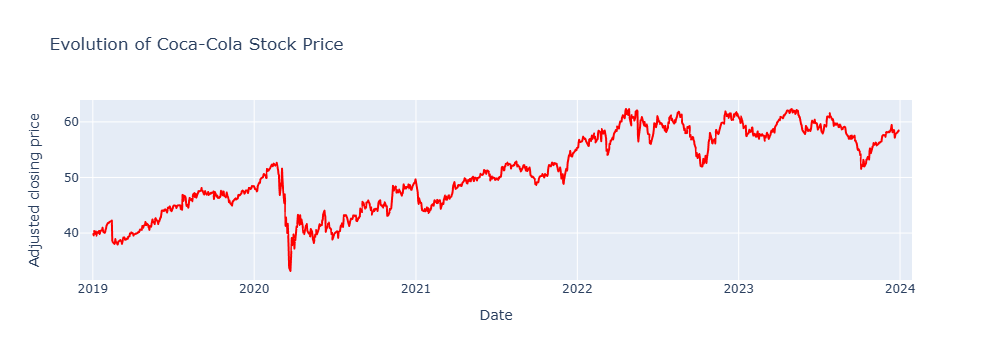

In [178]:
fig = px.line(data, x='Date', y='Adj Close',
              title='Evolution of Coca-Cola Stock Price',
              labels={'Adj Close':'Adjusted closing price', 'Date':'Date'})
fig.update_xaxes(range=[data['Date'].min() - pd.Timedelta(days=30), data['Date'].max() + pd.Timedelta(days=30)])
fig.update_traces(line_color='red')
fig.show()

## Stock Candlestick Chart

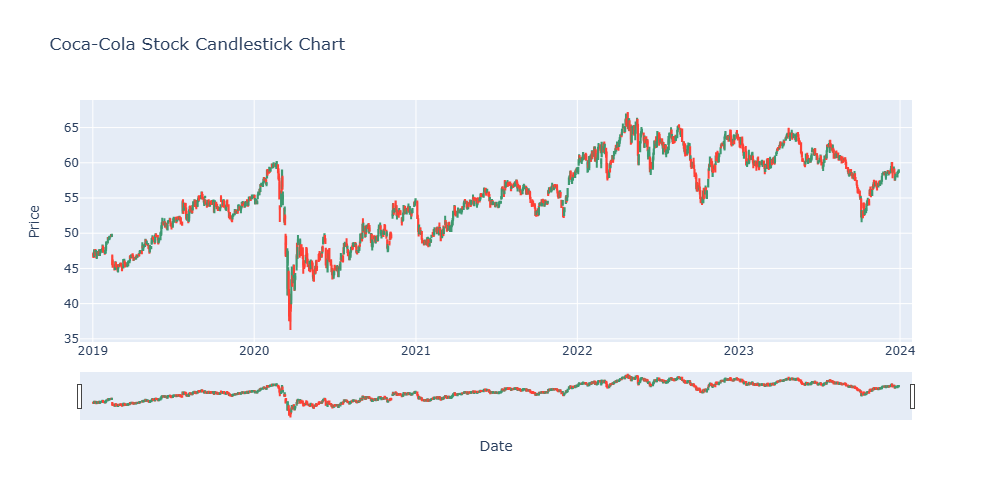

In [208]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])
fig.update_xaxes(range=[data['Date'].min() - pd.Timedelta(days=30), data['Date'].max() + pd.Timedelta(days=30)])

fig.update_layout(title='Coca-Cola Stock Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.update_layout(width=800, height=500)

fig.show()

## Trading Volume Over Time

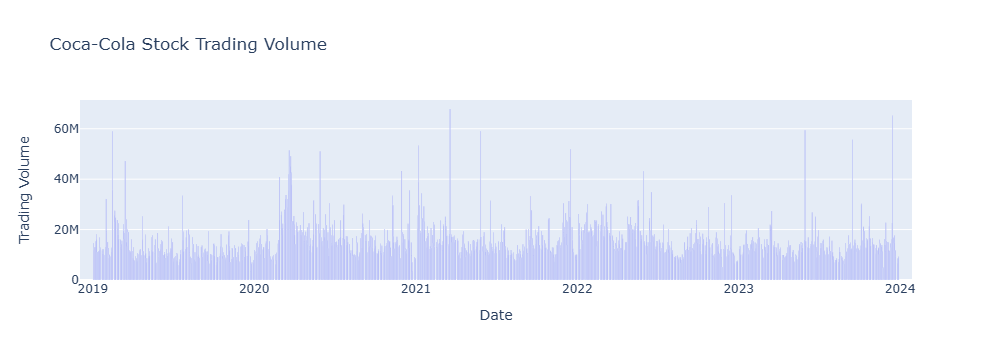

In [171]:
fig = px.bar(data, x='Date', y='Volume',
             title='Coca-Cola Stock Trading Volume',
             labels={'Volume':'Trading Volume', 'Date':'Date'})
fig.update_xaxes(range=[data['Date'].min() - pd.Timedelta(days=30), data['Date'].max() + pd.Timedelta(days=30)])
fig.update_traces(marker_color='blue')
fig.show()

## Correlation Matrix Between Variables

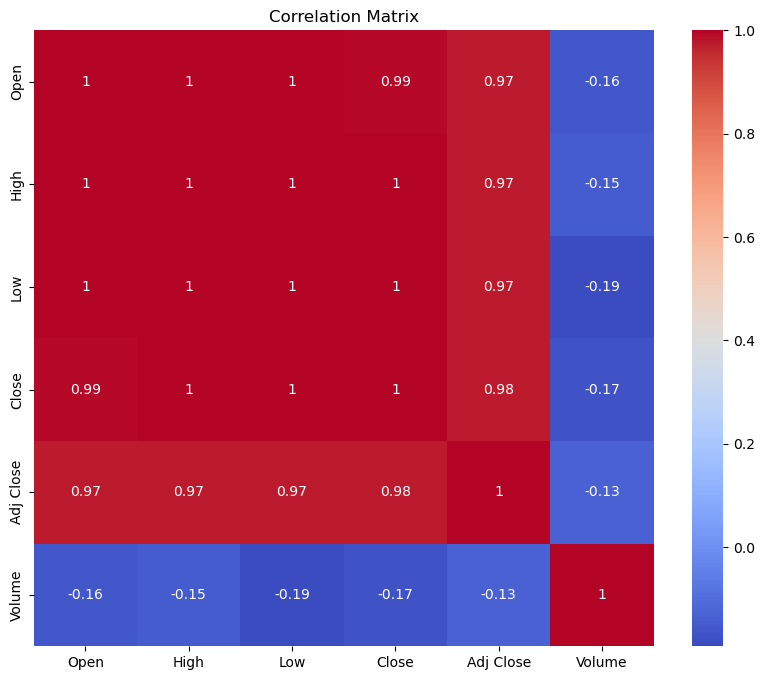

In [78]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Moving Average

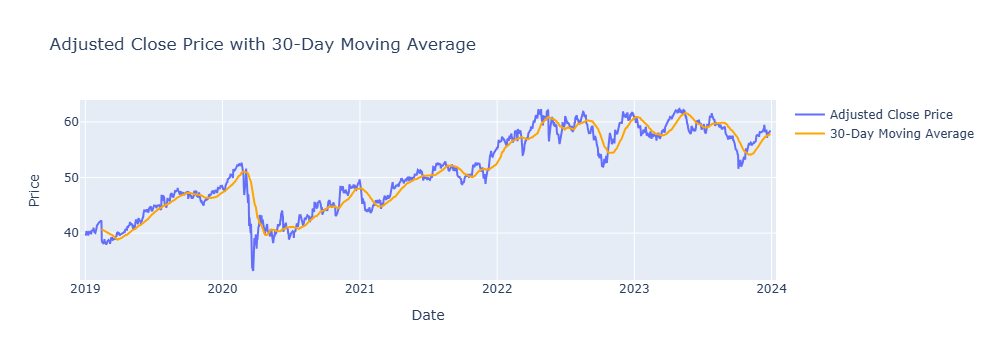

In [211]:
data['Moving Average'] = data['Adj Close'].rolling(window=30).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Adj Close'], mode='lines', name='Adjusted Close Price'))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Moving Average'], mode='lines', name='30-Day Moving Average', line=dict(color='orange')))

fig.update_layout(title='Adjusted Close Price with 30-Day Moving Average',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.update_xaxes(range=[data['Date'].min() - pd.Timedelta(days=15), data['Date'].max() + pd.Timedelta(days=15)])

fig.show()

## Daily Price Range

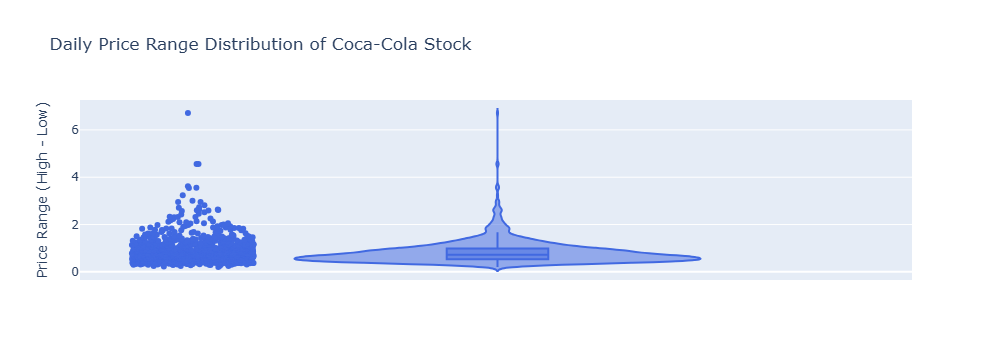

In [253]:
data['Price Range'] = data['High'] - data['Low']

fig = px.violin(data, y='Price Range', box=True, points='all', title='Daily Price Range Distribution of Coca-Cola Stock', labels={'Price Range':'Price Range (High - Low)'})

fig.update_traces(marker=dict(color='royalblue'))

fig.show()

## Histogram of Adjusted Close Prices

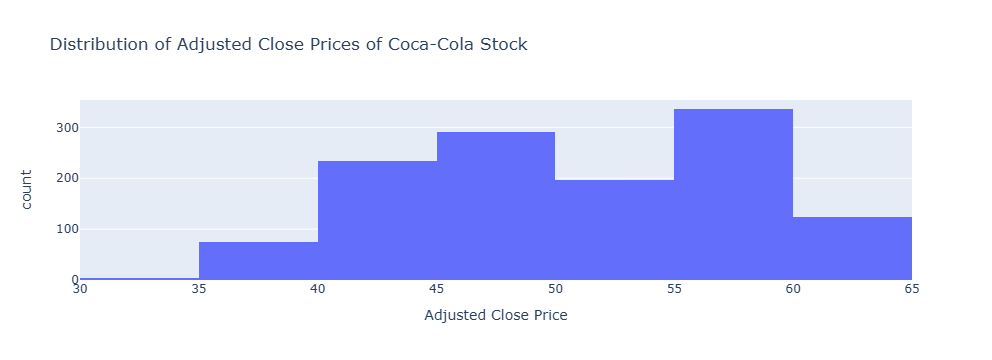

In [52]:
# Rule of Sturges
n= data.shape[0]
k = int(1 + (10 /3) * np.log10(n).round(0))

fig = px.histogram(data, x='Adj Close', nbins=k,
                   title='Distribution of Adjusted Close Prices of Coca-Cola Stock',
                   labels={'Adj Close':'Adjusted Close Price'})
fig.show()

## Volume vs. Adjusted Close Price

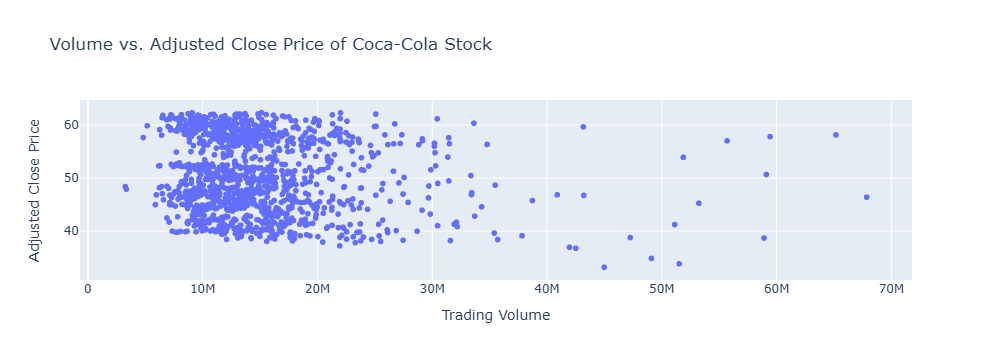

In [57]:
fig = px.scatter(data, x='Volume', y='Adj Close', title='Volume vs. Adjusted Close Price of Coca-Cola Stock', labels={'Volume':'Trading Volume', 'Adj Close':'Adjusted Close Price'})
fig.show()

## Rolling Standard Deviation

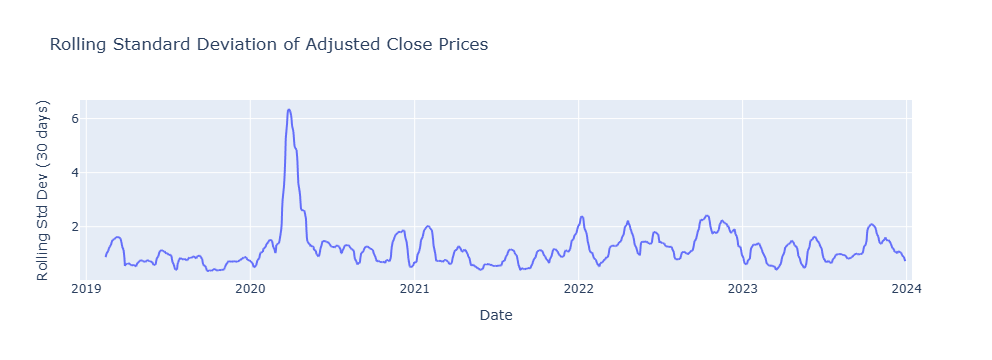

In [236]:
data['Rolling Std Dev'] = data['Adj Close'].rolling(window=30).std()

fig = px.line(data, x='Date', y='Rolling Std Dev',
              title='Rolling Standard Deviation of Adjusted Close Prices',
              labels={'Rolling Std Dev':'Rolling Std Dev (30 days)', 'Date':'Date'})
fig.update_xaxes(range=[data['Date'].min() - pd.Timedelta(days=15), data['Date'].max() + pd.Timedelta(days=15)])

fig.show()

## Relative Strength Index (RSI)

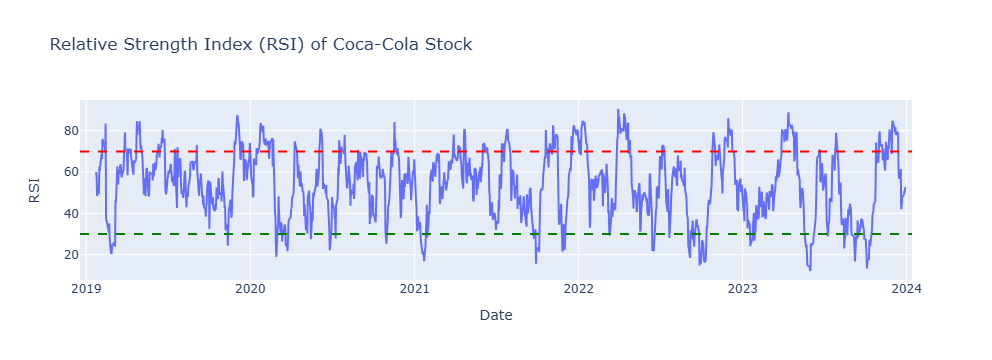

In [238]:
# Calculating RSI
def calculate_rsi(data, window):
    diff = data.diff(1).dropna()
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data['Adj Close'], 14)

fig = px.line(data, x='Date', y='RSI', title='Relative Strength Index (RSI) of Coca-Cola Stock', labels={'RSI':'RSI', 'Date':'Date'})
fig.add_hline(y=70, line_dash="dash", line_color="red")
fig.add_hline(y=30, line_dash="dash", line_color="green")
fig.update_xaxes(range=[data['Date'].min() - pd.Timedelta(days=15), data['Date'].max() + pd.Timedelta(days=15)])
fig.show()


### OBS

- The green line is typically at 30. When the RSI drops below this level, it suggests that the asset is coming, which may indicate a purchase opportunity, as the price may be close to a reversal point.
- The red line is typically 70. When the RSI rises above this level, it suggests that the asset is overcomposed, which may indicate a sales opportunity, as the price may be close to a downward reversal point.